### Bayesian regression

Machine Learning Algorithms

Dates: 2022-3-25

Author: Yung-Kyun Noh

Department of Computer Science, Hanyang University & KIAS


In [1]:
import numpy as np
import matplotlib.pyplot as plt

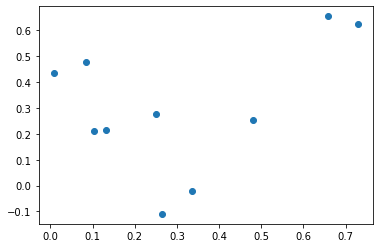

In [48]:
# Data generation
n_data = 10
sigma_sq = .1
xs = np.random.rand(n_data)
ws = .1*np.random.randn(n_data) + 1
ys = ws*xs + np.sqrt(sigma_sq)*np.random.randn(n_data)

plt.scatter(xs, ys)

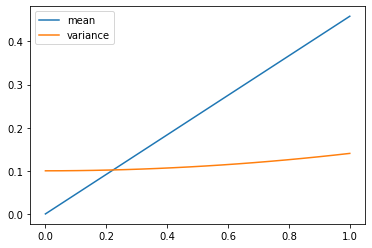

In [54]:
validate_xs = np.linspace(0, 1, 20)

sigma_sq_model = 0.1
sigma_sq0_model = 0.1
pred_ys = validate_xs/(np.matmul(xs, xs.T) + sigma_sq_model/sigma_sq0_model)*np.matmul(xs.T, ys)
pred_conf = sigma_sq_model + sigma_sq0_model*validate_xs**2 - \
    sigma_sq0_model*validate_xs*np.matmul(xs, xs.T)/(np.matmul(xs, xs.T) + sigma_sq_model/sigma_sq0_model)*validate_xs

plt.plot(validate_xs, pred_ys, label='mean')
plt.plot(validate_xs, pred_conf, label='variance')
plt.legend()

In [55]:
def logGaussian(xs, mu, Sig):
    if xs.ndim == 1:
        dim = 1
        log_ps = -0.5*dim*np.log(2*np.pi) - 0.5*np.log(Sig)
        log_ps += -0.5*(xs - mu)**2/Sig
    else:
        dim = len(xs[0])
        mu = mu.reshape(1,-1)
        log_ps = -0.5*dim*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(Sig))
        invSig = np.linalg.inv(Sig)
        log_ps += -0.5*np.diag(np.matmul(np.matmul((xs - mu), invSig), (xs - mu).T))

    return log_ps

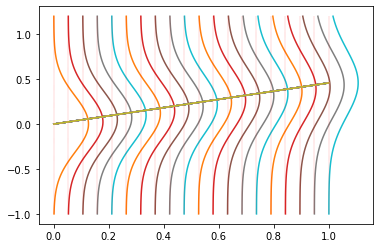

In [78]:
for x_idx in range(len(validate_xs)):
#     print(x_idx)

    grid_num = 100
    y_inputs = np.linspace(-1,1.2,grid_num)
    log_ps1 = logGaussian(y_inputs, pred_ys[x_idx], pred_conf[x_idx])
    ps = np.exp(log_ps1)

    magnifier = .1
    plt.plot(validate_xs, pred_ys, label='mean')
    plt.plot(validate_xs[x_idx] + ps*magnifier, y_inputs)
    plt.plot([validate_xs[x_idx], validate_xs[x_idx]], [-1, 1.2], '--r', linewidth=.2)
